# Basic consensus sequence analysis using Python and Biopython

## Objectives

1. Introduce programming concepts to analyze DNA sequences.
2. Introduce the IPython / Jupyter notebook environment for exploratory and reproducible computing.
3. Introduce Binder as a way to run analyses from others.
4. Examine *E. coli* σ<sup>E</sup> promoter sequences.
5. Analyze the σ<sup>E</sup> consensus in comparison to the σ<sup>70</sup> consensus sequence.


### Some preliminaries to import some Python libraries we'll need

For each of the cells below, you'll need to run the cell. To do that...

1. Select the cell so it becomes active.
2. Hold down `SHIFT` and press `ENTER`.

In [1]:
from Bio import motifs
from Bio.Seq import Seq
from collections import OrderedDict

In [2]:
instances = [Seq('TACAA'),
             Seq('TACGC'),
             Seq('TACAC'),
             Seq('TACCC'),
             Seq('AACCC'),
             Seq('AATGC'),
             Seq('AATGC'),
            ]

In [3]:
m = motifs.create(instances)

In [4]:
print(m)

TACAA
TACGC
TACAC
TACCC
AACCC
AATGC
AATGC



In [5]:
len(m)

5

In [6]:
print(m.counts)

        0      1      2      3      4
A:   3.00   7.00   0.00   2.00   1.00
C:   0.00   0.00   5.00   2.00   6.00
G:   0.00   0.00   0.00   3.00   0.00
T:   4.00   0.00   2.00   0.00   0.00



In [7]:
m.consensus

Seq('TACGC', IUPACUnambiguousDNA())

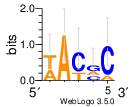

In [8]:
imagename = 'sample_logo.png'
m.weblogo(imagename)
from IPython.display import Image
Image(filename=imagename) 

## Now let's apply this same approach to analyze σ<sup>E</sup> consensus sequence

Using the "significantly regulated with promoter" dataset from [Virgil A Rhodius, et al. 2015 PLOS Biology, Table 1](http://dx.doi.org/10.1371/journal.pbio.0040002.t101)

In [9]:
# Upstream = index nucleotide for the first (of seven) nucleotides in the upstream element
# Downstream = index nucleotide for the first (of five) nucleotides in the downstream element
# +1 start of transcription is the last nucleotide listed (simplified analysis)
sigmaE_promoters = {
    'degP': {'sequence': 'GGAACTTCAGGCTATAAAACGAATCTGAAGAACAC', 'upstream': 0, 'downstream': 23,},
    'rseP': {'sequence': 'GGAACTAAAAGCCGTAGATGGTATCGAAACGCCTG', 'upstream': 0, 'downstream': 23,},
    'sbmA': {'sequence': 'CGAACTAAGCGCCTTGCTATGGGTCACAATGGGCG', 'upstream': 0, 'downstream': 23,},
    'clpX': {'sequence': 'TGAACTTATGGCGCTTCATACGGGTCAATCATTAGA', 'upstream': 0, 'downstream': 24,},
    'ybfG': {'sequence': 'GGAACTTAATATTTAAAAAATGTTCCATACAATT', 'upstream': 0, 'downstream': 23,},
    'ompX': {'sequence': 'GAAACTCTTCGCGATTTGTGATGTCTAACGGGCCA', 'upstream': 0, 'downstream': 23,},
    'mdoG': {'sequence': 'TGAACGATACCGGGATTCTGTTGTCGGAATGGCTG', 'upstream': 0, 'downstream': 23,},
    'lpp': {'sequence': 'GGCACTTATTTTTGATCGTTCGCTCAAAGAAGCA', 'upstream': 0, 'downstream': 23,},
    'yeaY': {'sequence': 'GAAACTTCCGGGCAAAGAATGAATCTTAAGAGTA', 'upstream': 0, 'downstream': 23,},
    'sixA': {'sequence': 'GCAACTGACCTGCAATAAGAAGGTCAAAGCTATA', 'upstream': 0, 'downstream': 23,},
    'ddg': {'sequence': 'GGAACCATTGTCGTACATGATGGCCCAACCAATTG', 'upstream': 0, 'downstream': 23,},
    'yfeK': {'sequence': 'GAAACTTTACCTGATTCTGGCAGTCAAATCGGCTA', 'upstream': 0, 'downstream': 23,},
    'yfgC': {'sequence': 'GGAACGATATTTCACAGTATCGGTCAAATGACTA', 'upstream': 0, 'downstream': 23,},
    'yfgM': {'sequence': 'GGAACTTGCGCAGCAATTTGTTGACAAAAATGAA', 'upstream': 0, 'downstream': 23,},
    'rpoE': {'sequence': 'GGAACTTTACAAAAACGAGACACTCTAACCCTTTG', 'upstream': 0, 'downstream': 23,},
    'rseA': {'sequence': 'CGAACCCTGAGAACTTAATGTTGTCAGAAGAACTG', 'upstream': 0, 'downstream': 23,},
    'yfiO': {'sequence': 'GGAACATTTCGGCCAAAGCCTGATCTAAGCGTTGA', 'upstream': 0, 'downstream': 23,},
    'xerD': {'sequence': 'TGAACGCTTACCGTCGCGATCTGTCAATGATGGTG', 'upstream': 0, 'downstream': 23,},
    'yggN': {'sequence': 'CGAACTTTTCGACGTTTGGTGGGACTAAGAAAGCA', 'upstream': 0, 'downstream': 23,},
    'ygiM': {'sequence': 'CGAACTTAATGCGATCTTTTTTGTCAGTAGATAG', 'upstream': 0, 'downstream': 23,},
    'bacA': {'sequence': 'TAAACCAAACGGTTATAACCTGGTCATACGCAGTA', 'upstream': 0, 'downstream': 23,},
    'yraO': {'sequence': 'TGCACTAAATACTGATAATGTTGTCTTAACGGCG', 'upstream': 0, 'downstream': 23,},
    'greA': {'sequence': 'GGAACTTCAGGGTAAAATGACTATCAAAATGTGAA', 'upstream': 0, 'downstream': 23,},
    'yhbN': {'sequence': 'GAAAAGGTTAGAACATCCTATGAAATTCAAAACAAA', 'upstream': 0, 'downstream': 26,},
    'fkpA': {'sequence': 'GAAACTAATTTAAACAAAAAGAGTCTGAAAATAGA', 'upstream': 0, 'downstream': 23,},
    'malQ': {'sequence': 'GGAACAAGTGAAGGCAATTCTGGCCAAAGGCTA', 'upstream': 0, 'downstream': 23,},
    'rpoH': {'sequence': 'TGAACTTGTGGATAAAATCACGGTCTGATAAAACA', 'upstream': 0, 'downstream': 23,},
    'yhjJ': {'sequence': 'TGACATTTTCATGTTCTTGCGGTCTAACACGAA', 'upstream': 0, 'downstream': 22,},
    'yieE': {'sequence': 'CGAACTTTTAGCCGCTTTAGTCTGTCCATCATTCCA', 'upstream': 0, 'downstream': 24,},
    'plsB': {'sequence': 'AGAACCTTTTTACATTATGAGCGTCAATATCAGTG', 'upstream': 0, 'downstream': 23,},
}

### Let's look at the -35 sequence, the number of intervening nucleotides, and the -10 sequence

In [10]:
for promoter in sigmaE_promoters:
    # upstream element
    u1, u2 = sigmaE_promoters[promoter]['upstream'], sigmaE_promoters[promoter]['upstream'] + 7
    # number of intervening nucleotides
    intervening = sigmaE_promoters[promoter]['downstream'] - sigmaE_promoters[promoter]['upstream'] - 7
    # downstream element
    d1, d2 = sigmaE_promoters[promoter]['downstream'], sigmaE_promoters[promoter]['downstream'] + 5
    print(promoter,
          sigmaE_promoters[promoter]['sequence'][u1:u2], 
          intervening,
          sigmaE_promoters[promoter]['sequence'][d1:d2],
         )

rseA CGAACCC 16 TCAGA
rpoE GGAACTT 16 TCTAA
yraO TGCACTA 16 TCTTA
yhbN GAAAAGG 19 TCAAA
fkpA GAAACTA 16 TCTGA
clpX TGAACTT 17 TCAAT
degP GGAACTT 16 TCTGA
yeaY GAAACTT 16 TCTTA
ygiM CGAACTT 16 TCAGT
yhjJ TGACATT 15 TCTAA
plsB AGAACCT 16 TCAAT
yieE CGAACTT 17 TCCAT
yggN CGAACTT 16 ACTAA
malQ GGAACAA 16 CCAAA
yfgC GGAACGA 16 TCAAA
rpoH TGAACTT 16 TCTGA
ompX GAAACTC 16 TCTAA
mdoG TGAACGA 16 TCGGA
yfiO GGAACAT 16 TCTAA
ybfG GGAACTT 16 TCCAT
ddg GGAACCA 16 CCCAA
sixA GCAACTG 16 TCAAA
bacA TAAACCA 16 TCATA
greA GGAACTT 16 TCAAA
yfeK GAAACTT 16 TCAAA
sbmA CGAACTA 16 TCACA
rseP GGAACTA 16 TCGAA
xerD TGAACGC 16 TCAAT
lpp GGCACTT 16 TCAAA
yfgM GGAACTT 16 ACAAA


##### First, let's look at the ones with 16 nt spacing and compare the conservation across the region from the -35 through the -10

In [11]:
instances = []
for promoter in sigmaE_promoters:
    intervening = sigmaE_promoters[promoter]['downstream'] - sigmaE_promoters[promoter]['upstream'] - 7
    if intervening == 16:
        instances.append(Seq(sigmaE_promoters[promoter]['sequence'][0:sigmaE_promoters[promoter]['downstream'] + 5]))

In [12]:
m = motifs.create(instances)
print(m)

CGAACCCTGAGAACTTAATGTTGTCAGA
GGAACTTTACAAAAACGAGACACTCTAA
TGCACTAAATACTGATAATGTTGTCTTA
GAAACTAATTTAAACAAAAAGAGTCTGA
GGAACTTCAGGCTATAAAACGAATCTGA
GAAACTTCCGGGCAAAGAATGAATCTTA
CGAACTTAATGCGATCTTTTTTGTCAGT
AGAACCTTTTTACATTATGAGCGTCAAT
CGAACTTTTCGACGTTTGGTGGGACTAA
GGAACAAGTGAAGGCAATTCTGGCCAAA
GGAACGATATTTCACAGTATCGGTCAAA
TGAACTTGTGGATAAAATCACGGTCTGA
GAAACTCTTCGCGATTTGTGATGTCTAA
TGAACGATACCGGGATTCTGTTGTCGGA
GGAACATTTCGGCCAAAGCCTGATCTAA
GGAACTTAATATTTAAAAAATGTTCCAT
GGAACCATTGTCGTACATGATGGCCCAA
GCAACTGACCTGCAATAAGAAGGTCAAA
TAAACCAAACGGTTATAACCTGGTCATA
GGAACTTCAGGGTAAAATGACTATCAAA
GAAACTTTACCTGATTCTGGCAGTCAAA
CGAACTAAGCGCCTTGCTATGGGTCACA
GGAACTAAAAGCCGTAGATGGTATCGAA
TGAACGCTTACCGTCGCGATCTGTCAAT
GGCACTTATTTTTGATCGTTCGCTCAAA
GGAACTTGCGCAGCAATTTGTTGACAAA



In [13]:
m.consensus

Seq('GGAACTTTACGAGAAAAATATGGTCAAA', IUPACUnambiguousDNA())

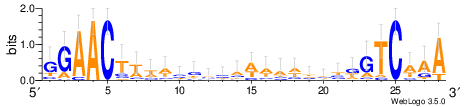

In [14]:
m.weblogo('sigmaE_long.png')
from IPython.display import Image
Image(filename='sigmaE_long.png') 

### Focus only on -35 region

In [15]:
instances = []
for promoter in sigmaE_promoters:
    # upstream element
    u1, u2 = sigmaE_promoters[promoter]['upstream'], sigmaE_promoters[promoter]['upstream'] + 7
    instances.append(Seq(sigmaE_promoters[promoter]['sequence'][u1:u2]))
m = motifs.create(instances)
m.consensus

Seq('GGAACTT', IUPACUnambiguousDNA())

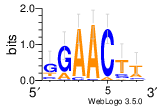

In [16]:
imagename = 'sigmaE_-35.png'
m.weblogo(imagename)
from IPython.display import Image
Image(filename=imagename) 

### Focus on -10 region

In [17]:
instances = []
for promoter in sigmaE_promoters:
    # downstream element
    d1, d2 = sigmaE_promoters[promoter]['downstream'], sigmaE_promoters[promoter]['downstream'] + 5
    instances.append(Seq(sigmaE_promoters[promoter]['sequence'][d1:d2]))
m = motifs.create(instances)
m.consensus

Seq('TCAAA', IUPACUnambiguousDNA())

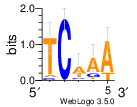

In [18]:
imagename = 'sigmaE_-10.png'
m.weblogo(imagename)
from IPython.display import Image
Image(filename=imagename) 

### Is there nucleotide preference in the transcriptional start site?

In [19]:
instances = []
for promoter in sigmaE_promoters:
    instances.append(Seq(sigmaE_promoters[promoter]['sequence'][-4:]))
m = motifs.create(instances)
print(m)

ACTG
TTTG
GGCG
CAAA
TAGA
TAGA
ACAC
AGTA
ATAG
CGAA
AGTG
TCCA
AGCA
GCTA
ACTA
AACA
GCCA
GCTG
TTGA
AATT
ATTG
TATA
AGTA
TGAA
GCTA
GGCG
CCTG
GGTG
AGCA
TGAA



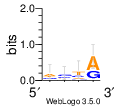

In [20]:
imagename = 'sigmaE_start.png'
m.weblogo(imagename)
from IPython.display import Image
Image(filename=imagename) 